## Libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math
import calendar
import calendar
from datetime import datetime

In [2]:
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
%matplotlib inline

In [4]:
np.set_printoptions(precision=2)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load data

In [6]:
df_sales_daily = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Pharma Sales/salesdaily.csv')

In [7]:
df_sales_monthly = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Pharma Sales/salesmonthly.csv')

In [8]:
df_sales_hourly = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Pharma Sales/saleshourly.csv')

In [76]:
df_sales_weekly = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Pharma Sales/salesweekly.csv')

In [9]:
df_sales_daily.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


## Data Analysis

### M01AB drug by Weekday

In [10]:
df_sales_daily_M01AB = df_sales_daily[['M01AB', 'Weekday Name']]
result_M01AB = df_sales_daily_M01AB.groupby(['Weekday Name'], as_index=False).sum().sort_values('M01AB', ascending=False)

In [11]:
result_day_M01AB = result_M01AB.iloc[0,0]

In [12]:
result_value_M01AB = round(result_M01AB.iloc[0,1], 2)

In [13]:
print('The 1st drug, M01AB, was most frequently sold on ' + str(result_day_M01AB) 
      + ' with the volume of ' + str(result_value_M01AB))

The 1st drug, M01AB, was most frequently sold on Saturday with the volume of 1724.05


### M01AE drug by Weekday

In [14]:
df_sales_daily_M01AE = df_sales_daily[['M01AE', 'Weekday Name']]
result_M01AE = df_sales_daily_M01AE.groupby(['Weekday Name'], as_index=False).sum().sort_values('M01AE', ascending=False)

In [15]:
result_day_M01AE = result_M01AE.iloc[0,0]

In [16]:
result_value_M01AE = round(result_M01AE.iloc[0,1], 2)

In [17]:
print('The 2nd drug, M01AE, was most frequently sold on ' + str(result_day_M01AE) 
      + ' with the volume of ' + str(result_value_M01AE))

The 2nd drug, M01AE, was most frequently sold on Sunday with the volume of 1384.94


### N02BA drug by Weekday

In [18]:
df_sales_daily_N02BA = df_sales_daily[['N02BA', 'Weekday Name']]
result_N02BA = df_sales_daily_N02BA.groupby(['Weekday Name'], as_index=False).sum().sort_values('N02BA', ascending=False)

In [19]:
result_day_N02BA = result_N02BA.iloc[0,0]

In [20]:
result_value_N02BA = round(result_N02BA.iloc[0,1], 2)

In [21]:
print('The 3rd drug, N02BA, was most frequently sold on ' + str(result_day_N02BA) 
      + ' with the volume of ' + str(result_value_N02BA))

The 3rd drug, N02BA, was most frequently sold on Tuesday with the volume of 1272.97


### N02BE drug by Weekday

In [22]:
df_sales_daily_N02BE = df_sales_daily[['N02BE', 'Weekday Name']]
result_N02BE = df_sales_daily_N02BE.groupby(['Weekday Name'], as_index=False).sum().sort_values('N02BE', ascending=False)

In [23]:
result_day_N02BE = result_N02BE.iloc[0,0]

In [24]:
result_value_N02BE = round(result_N02BE.iloc[0,1], 2)

In [25]:
print('The 4th drug, N02BE, was most frequently sold on ' + str(result_day_N02BE) 
      + ' with the volume of ' + str(result_value_N02BE))

The 4th drug, N02BE, was most frequently sold on Saturday with the volume of 10107.5


### N05B drug by Weekday

In [26]:
df_sales_daily_N05B = df_sales_daily[['N05B', 'Weekday Name']]
result_N05B = df_sales_daily_N05B.groupby(['Weekday Name'], as_index=False).sum().sort_values('N05B', ascending=False)

In [27]:
result_day_N05B = result_N05B.iloc[0,0]

In [28]:
result_value_N05B = round(result_N05B.iloc[0,1], 2)

In [29]:
print('The 5th drug, N05B, was most frequently sold on ' + str(result_day_N05B) 
      + ' with the volume of ' + str(result_value_N05B))

The 5th drug, N05B, was most frequently sold on Wednesday with the volume of 3037.18


### N05C drug by Weekday

In [30]:
df_sales_daily_N05C = df_sales_daily[['N05C', 'Weekday Name']]
result_N05C = df_sales_daily_N05C.groupby(['Weekday Name'], as_index=False).sum().sort_values('N05C', ascending=False)

In [31]:
result_day_N05C = result_N05C.iloc[0,0]

In [32]:
result_value_N05C = round(result_N05C.iloc[0,1], 2)

In [33]:
print('The 6th drug, N05C, was most frequently sold on ' + str(result_day_N05C) 
      + ' with the volume of ' + str(result_value_N05C))

The 6th drug, N05C, was most frequently sold on Friday with the volume of 229.5


### R03 drug by Weekday

In [34]:
df_sales_daily_R03 = df_sales_daily[['R03', 'Weekday Name']]
result_R03 = df_sales_daily_R03.groupby(['Weekday Name'], as_index=False).sum().sort_values('R03', ascending=False)

In [35]:
result_day_R03 = result_R03.iloc[0,0]

In [36]:
result_value_R03 = round(result_R03.iloc[0,1], 2)

In [37]:
print('The 7th drug, R03, was most frequently sold on ' + str(result_day_R03) 
      + ' with the volume of ' + str(result_value_R03))

The 7th drug, R03, was most frequently sold on Monday with the volume of 1791.46


### R06 drug by Weekday

In [38]:
df_sales_daily_R06 = df_sales_daily[['R06', 'Weekday Name']]
result_R06 = df_sales_daily_R06.groupby(['Weekday Name'], as_index=False).sum().sort_values('R06', ascending=False)

In [39]:
result_day_R06 = result_R06.iloc[0,0]

In [40]:
result_value_R06 = round(result_R06.iloc[0,1], 2)

In [41]:
print('The 8th drug, R06, was most frequently sold on ' + str(result_day_R06) 
      + ' with the volume of ' + str(result_value_R06))

The 8th drug, R06, was most frequently sold on Saturday with the volume of 986.46


## Top 3 drugs gaving the largest sales in January 2015, July 2016, September 2017

In [42]:
df_sales_monthly.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,2014-01-31,127.69,99.090,152.100,878.030,354.0,50.0,112.0,48.2
1,2014-02-28,133.32,126.050,177.000,1001.900,347.0,31.0,122.0,36.2
2,2014-03-31,137.44,92.950,147.655,779.275,232.0,20.0,112.0,85.4
3,2014-04-30,113.10,89.475,130.900,698.500,209.0,18.0,97.0,73.7
4,2014-05-31,101.79,119.933,132.100,628.780,270.0,23.0,107.0,123.7


In [43]:
def top_3_drugs_by_month(month, year):
    month = str(month) if (month > 9) else '0' + str(month)
    year = str(year)

    # Filter by Date
    sales = df_sales_monthly.loc[df_sales_monthly['datum'].str.contains('^' + year + '\-' + month + '' , flags=re.I, regex=True)]
    
    # Reset index
    sales = sales.reset_index()
    
    # Filter chosen drugs
    top_Sales_by_Product = sales[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
    
    # Sort values horizontally in descending order
    top_Sales_by_Product = top_Sales_by_Product.sort_values(by=0, ascending=False, axis=1)
    
    # Print results
    print('Top 3 Drugs by Sale in ' + calendar.month_name[int(month)] + ' ' + year)
    for drug in top_Sales_by_Product.columns.values[0:3]:
        print(' - Product: ' + str(drug) + ', Volume sold: ' + str(round(top_Sales_by_Product[drug].iloc[0], 2)))
    print("\n")

In [44]:
# Top 3 Drugs by Sale in January 2014
top_3_drugs_by_month(1, 2014)

# Top 3 Drugs by Sale in January 2015
top_3_drugs_by_month(1, 2015)

# Top 3 Drugs by Sale in July 2016
top_3_drugs_by_month(7, 2016)

# Top 3 Drugs by Sale in September 2017
top_3_drugs_by_month(9, 2017)

Top 3 Drugs by Sale in January 2014
 - Product: N02BE, Volume sold: 878.03
 - Product: N05B, Volume sold: 354.0
 - Product: N02BA, Volume sold: 152.1


Top 3 Drugs by Sale in January 2015
 - Product: N02BE, Volume sold: 1044.24
 - Product: N05B, Volume sold: 463.0
 - Product: R03, Volume sold: 177.25


Top 3 Drugs by Sale in July 2016
 - Product: N02BE, Volume sold: 652.36
 - Product: N05B, Volume sold: 240.0
 - Product: M01AB, Volume sold: 203.97


Top 3 Drugs by Sale in September 2017
 - Product: N02BE, Volume sold: 863.75
 - Product: N05B, Volume sold: 223.0
 - Product: R03, Volume sold: 139.0




## Top 1 Drug sold on Mondays in years

In [45]:
df_sales_daily = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Pharma Sales/salesdaily.csv')

In [46]:
df_sales_daily.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


### 2014

In [47]:
df_sales_daily_2014 = df_sales_daily.loc[df_sales_daily['datum'].str.contains('2014', flags=re.I, regex=True) & (df_sales_daily['Weekday Name'] == 'Monday')]

In [48]:
df_sales_daily_2014 = df_sales_daily_2014.groupby(['Weekday Name'], as_index=False).sum()

In [49]:
df_sales_daily_2014 = df_sales_daily_2014[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
result_2014 = df_sales_daily_2014.sort_values(by=0, ascending=False, axis=1)
for field in result_2014.columns.values[0:1]:
    print('The most frequently sold Drug on Mondays in 2014 is ' + str(field) + ' with the Volume of ' + str(round(result_2014[field].iloc[0], 2)))

The most frequently sold Drug on Mondays in 2014 is N02BE with the Volume of 1337.46


### 2015

In [50]:
df_sales_daily_2015 = df_sales_daily.loc[df_sales_daily['datum'].str.contains('2015', flags=re.I, regex=True) & (df_sales_daily['Weekday Name'] == 'Monday')]

In [51]:
df_sales_daily_2015 = df_sales_daily_2015.groupby(['Weekday Name'], as_index=False).sum()

In [52]:
df_sales_daily_2015 = df_sales_daily_2015[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
result_2015 = df_sales_daily_2015.sort_values(by=0, ascending=False, axis=1)
for field in result_2015.columns.values[0:1]:
    print('The most frequently sold Drug on Mondays in 2015 is ' + str(field) + ' with the Volume of ' + str(round(result_2015[field].iloc[0], 2)))

The most frequently sold Drug on Mondays in 2015 is N02BE with the Volume of 1915.91


### 2016

In [53]:
df_sales_daily_2016 = df_sales_daily.loc[df_sales_daily['datum'].str.contains('2016', flags=re.I, regex=True) & (df_sales_daily['Weekday Name'] == 'Monday')]

In [54]:
df_sales_daily_2016 = df_sales_daily_2016.groupby(['Weekday Name'], as_index=False).sum()

In [55]:
df_sales_daily_2016 = df_sales_daily_2016[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
result_2016 = df_sales_daily_2016.sort_values(by=0, ascending=False, axis=1)
for field in result_2016.columns.values[0:1]:
    print('The most frequently sold Drug on Mondays in 2016 is ' + str(field) + ' with the Volume of ' + str(round(result_2016[field].iloc[0], 2)))

The most frequently sold Drug on Mondays in 2016 is N02BE with the Volume of 1724.8


### 2017

#### Filter out all except Mondays in 2017

In [56]:
df_sales_daily_2017 = df_sales_daily.loc[df_sales_daily['datum'].str.contains('2017', flags=re.I, regex=True) & (df_sales_daily['Weekday Name'] == 'Monday')]

#### Group by Weekday and Sum up

In [57]:
df_sales_daily_2017 = df_sales_daily_2017.groupby(['Weekday Name'], as_index=False).sum()

#### Filter by the chosen Drugs and Sort by descending order

In [58]:
df_sales_daily_2017 = df_sales_daily_2017[['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']]
result_2017 = df_sales_daily_2017.sort_values(by=0, ascending=False, axis=1)

In [59]:
for field in result_2017.columns.values[0:1]:
    print('The most frequently sold Drug on Mondays in 2017 is ' + str(field) + ' with the Volume of ' + str(round(result_2017[field].iloc[0], 2)))

The most frequently sold Drug on Mondays in 2017 is N02BE with the Volume of 1160.56


## Time Series Analysis

In [60]:
df_sales_daily = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Projects/Pharma Sales/salesdaily.csv')

In [65]:
df_sales_daily.head()

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
0,1/2/2014,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
1,1/3/2014,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2,1/4/2014,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
3,1/5/2014,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
4,1/6/2014,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


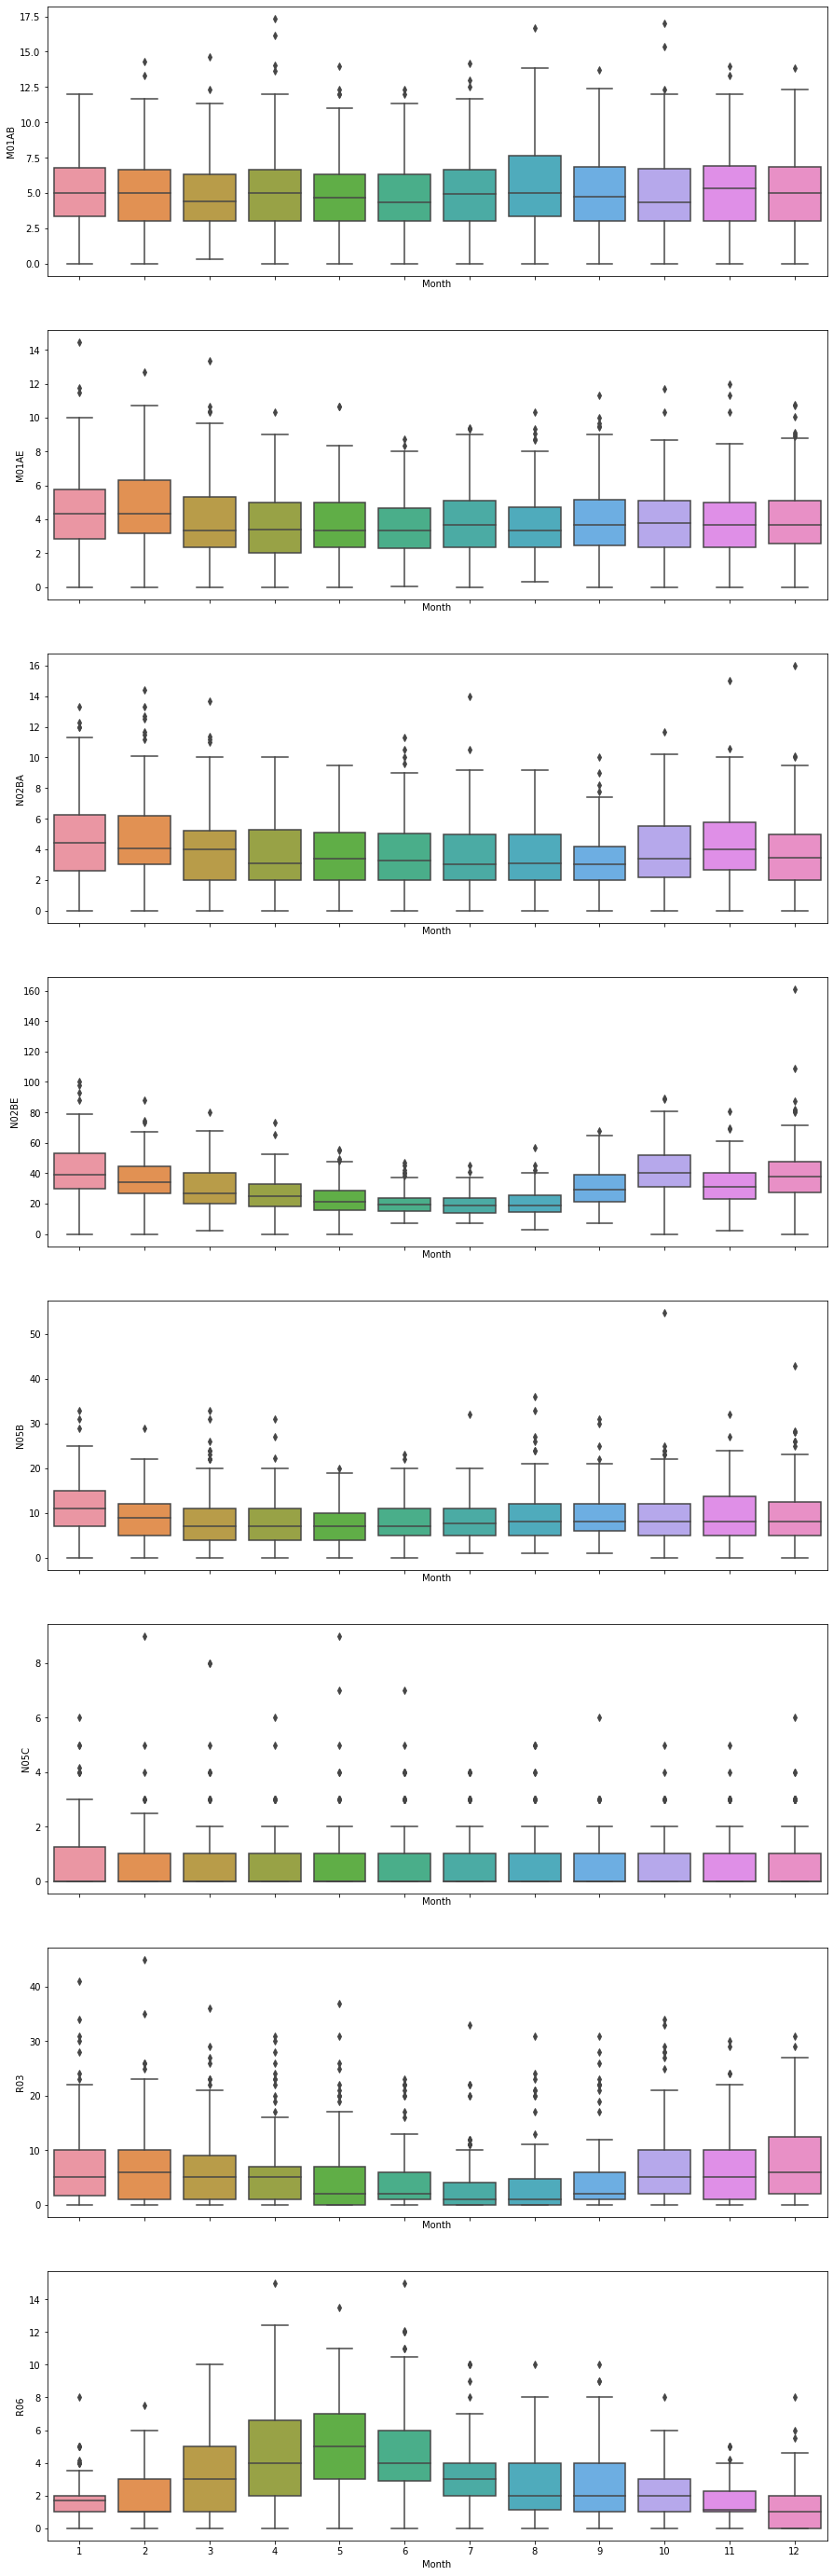

In [67]:
fig, axes = plt.subplots(8, 1, figsize=(15, 50), sharex=True)
for name, ax in zip(['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06'], axes):
    sns.boxplot(data=df_sales_daily, x='Month', y=name, ax=ax)

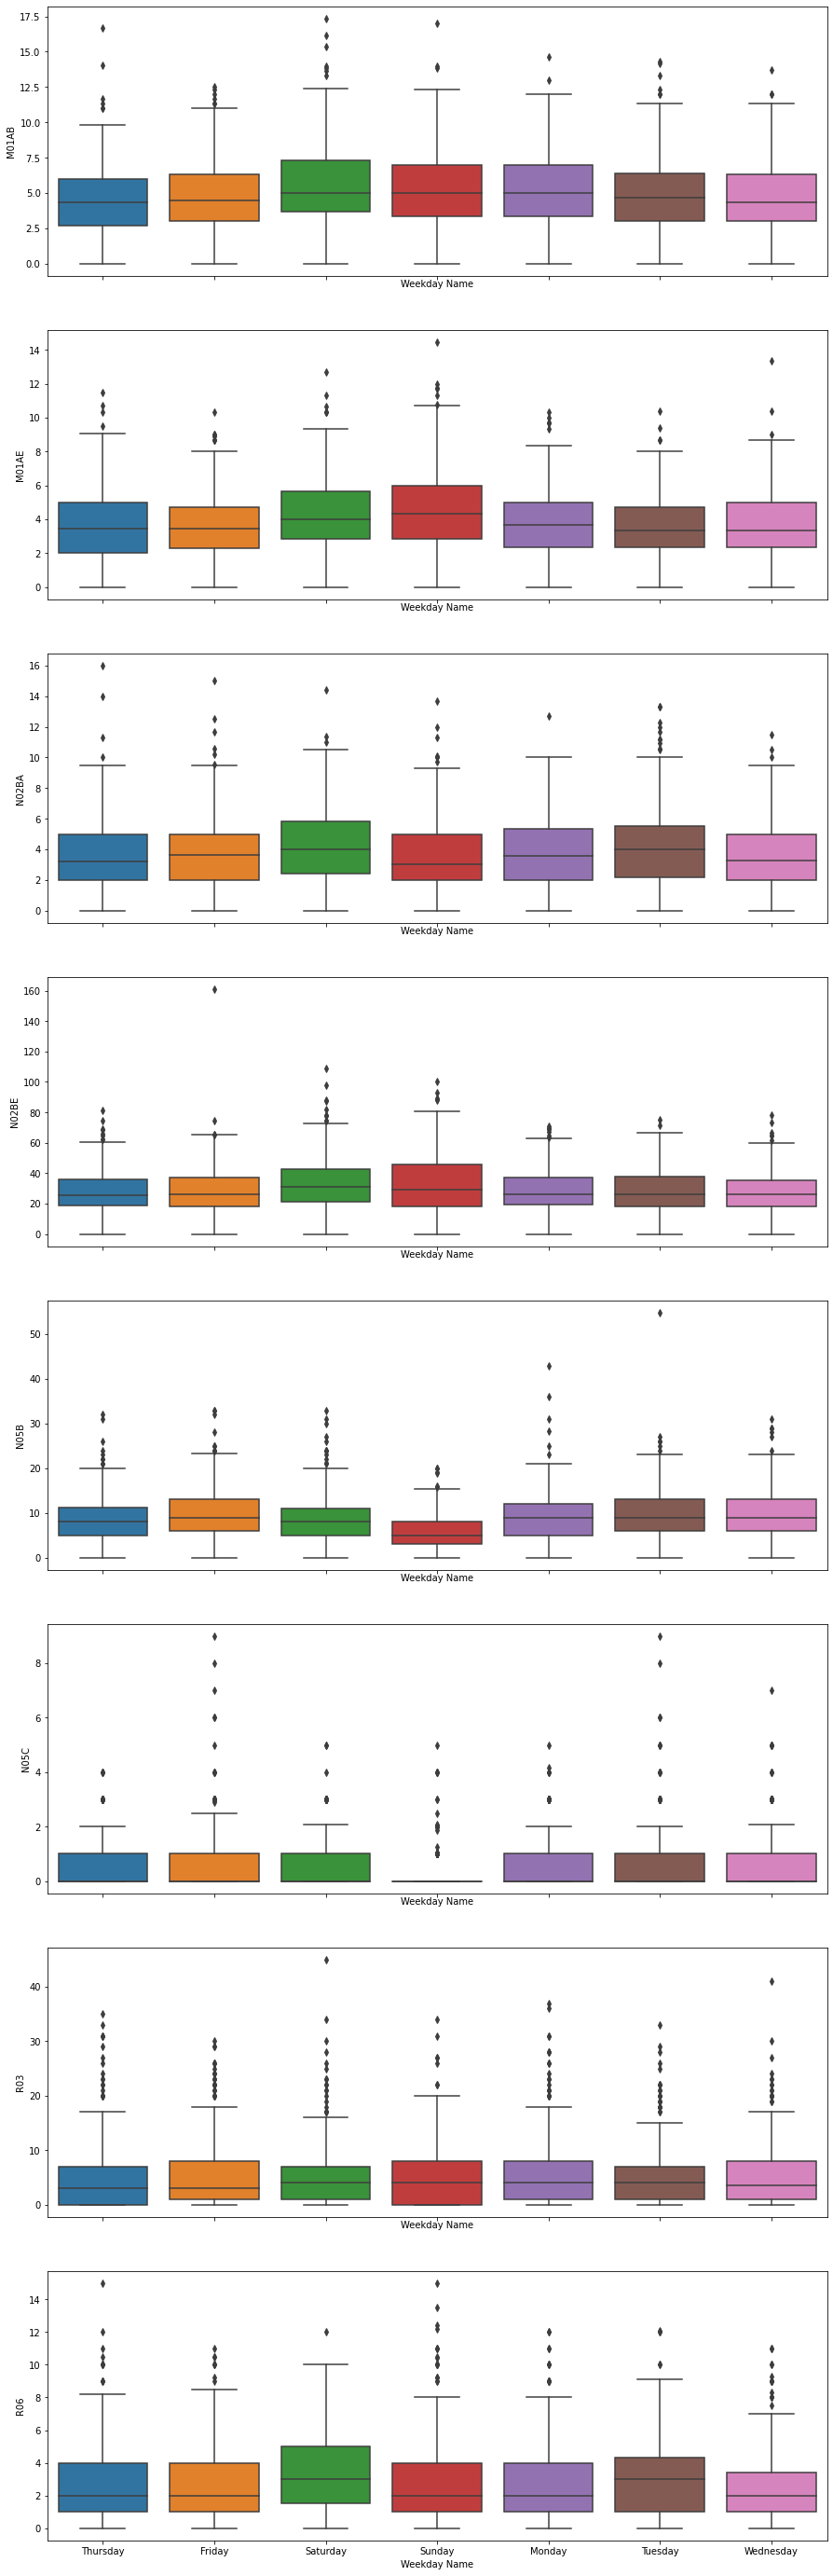

In [69]:
fig, axes = plt.subplots(8, 1, figsize=(15, 50), sharex=True)
for name, ax in zip(['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06'], axes):
    sns.boxplot(data=df_sales_daily, x='Weekday Name', y=name, ax=ax)

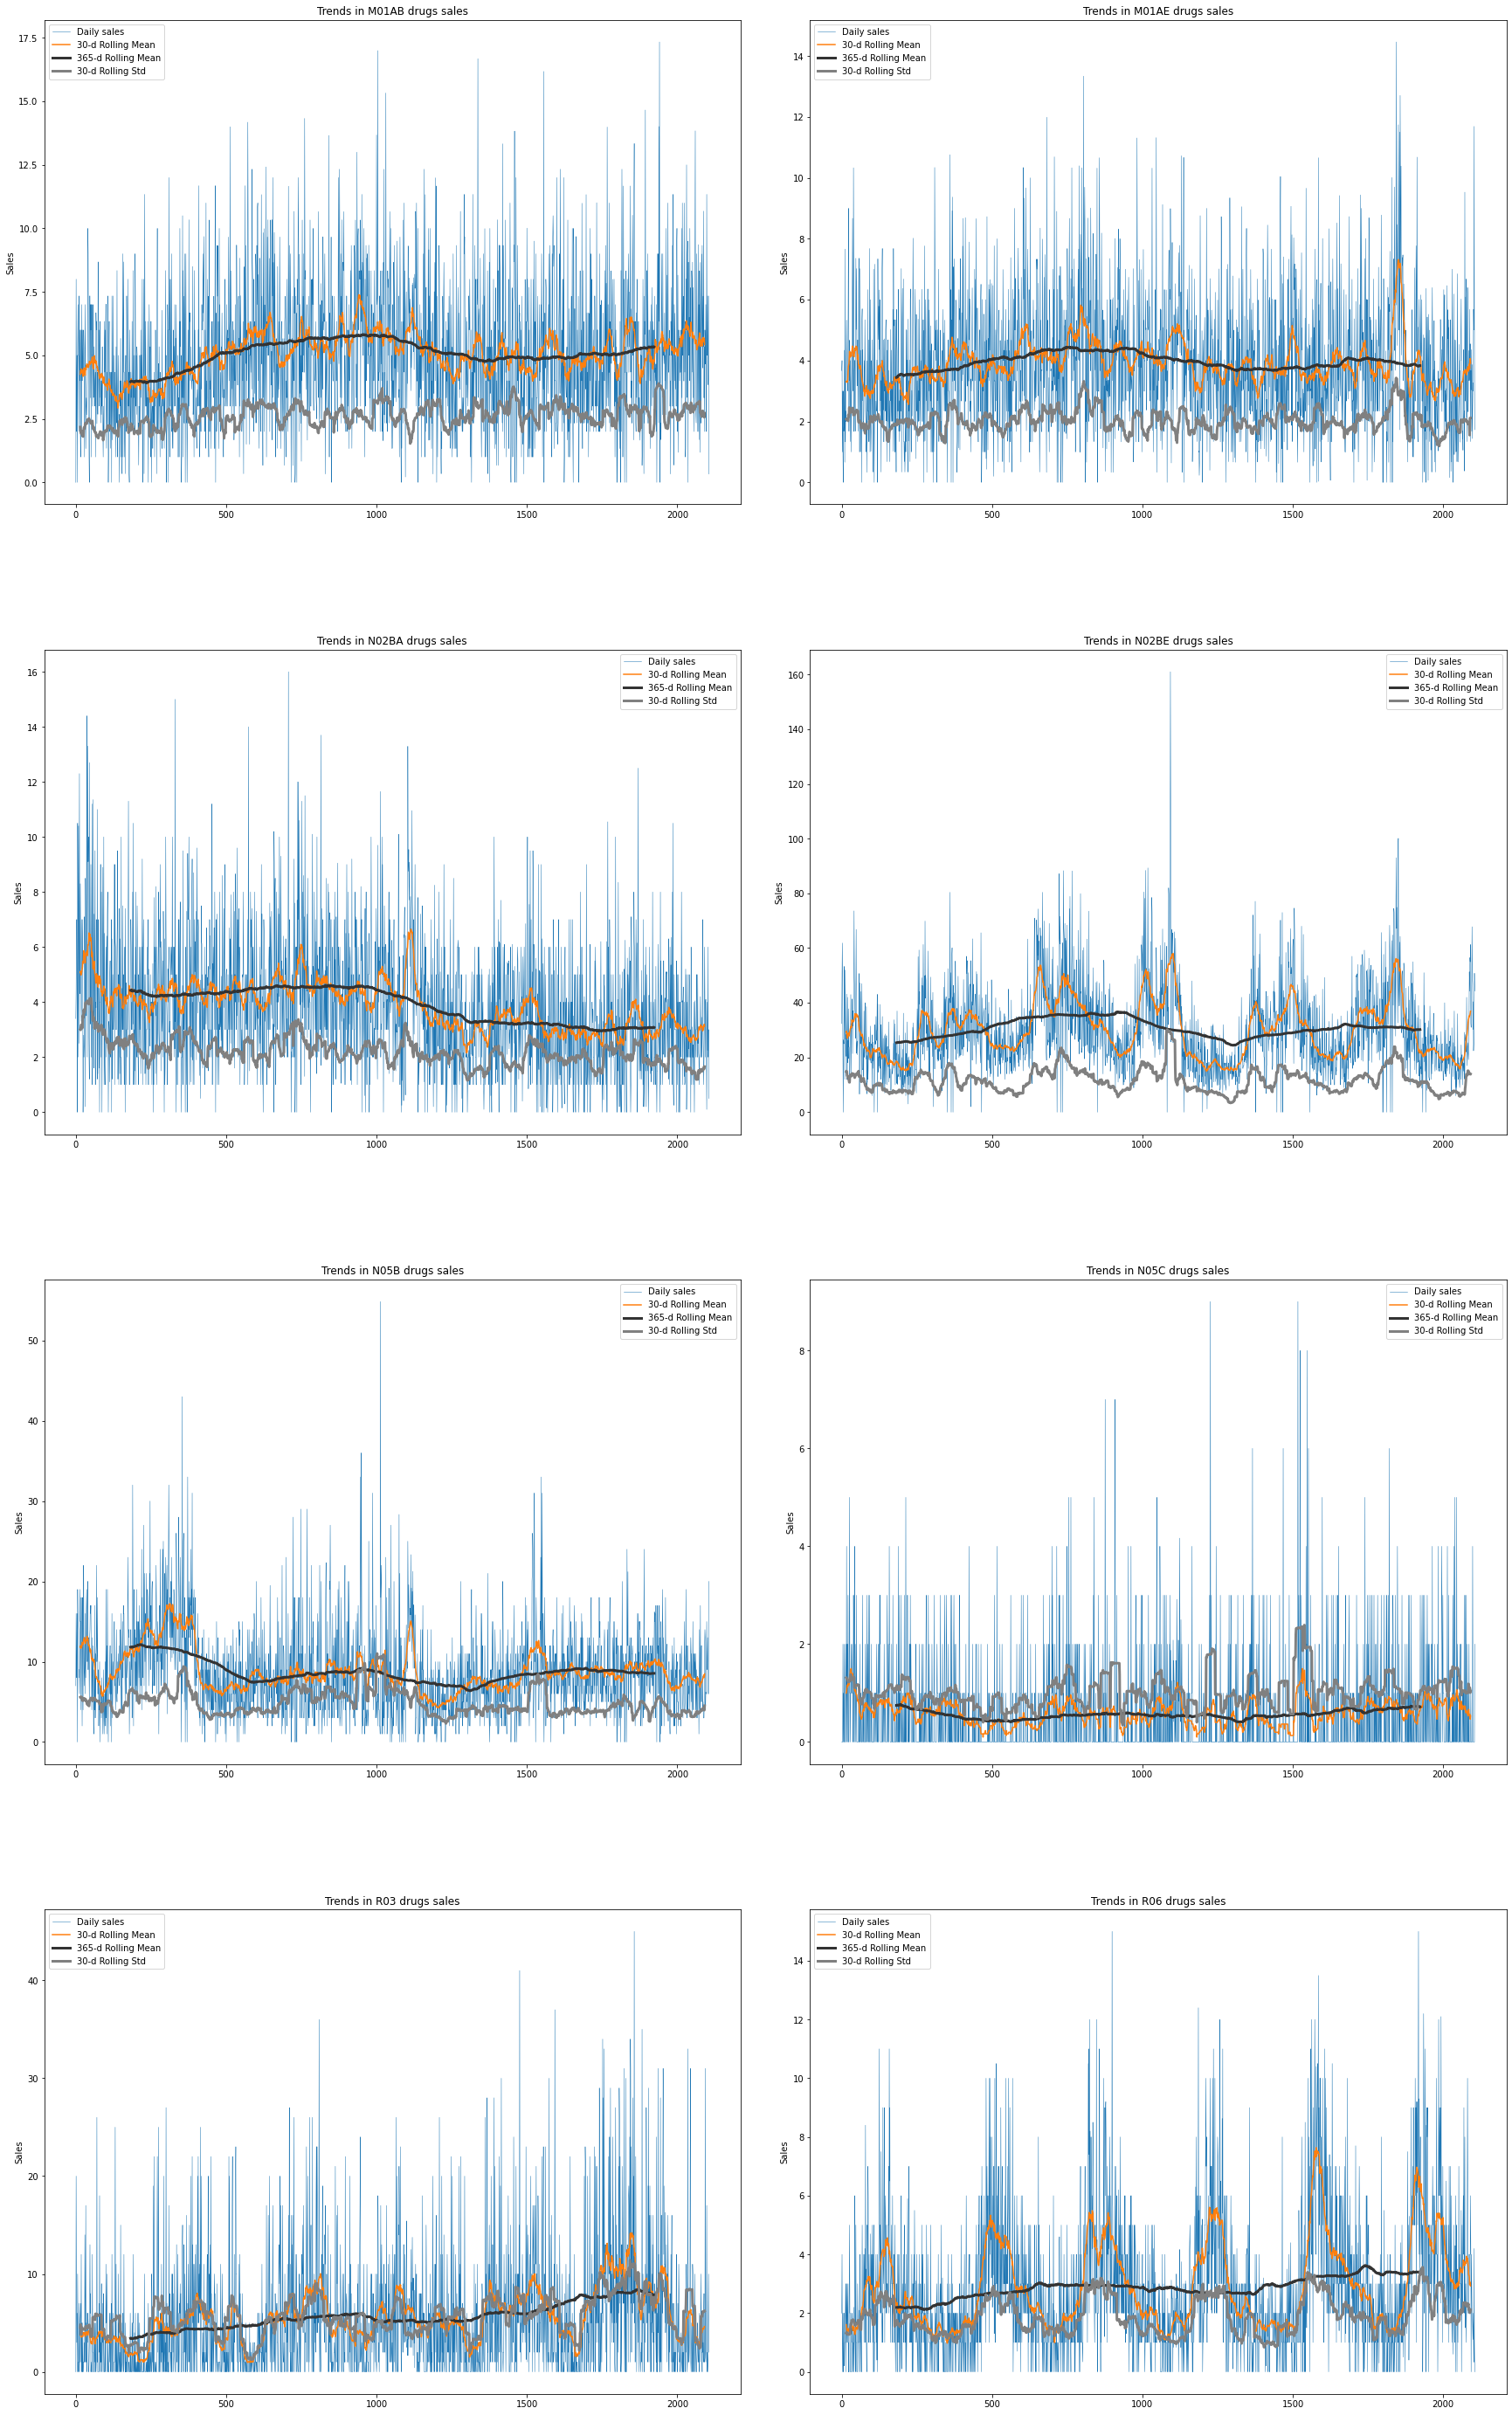

In [72]:
cols_plot = ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']
dfatc_365d = df_sales_daily[cols_plot].rolling(window=365, center=True).mean()
dfatc_30d = df_sales_daily[cols_plot].rolling(30, center=True).mean()
dfatc_std = df_sales_daily[cols_plot].rolling(30, center=True).std()
subplotindex = 0
numrows = 4
numcols = 2
fig, ax = plt.subplots(numrows, numcols, figsize=(30, 50))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

for x in cols_plot:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    ax[rowindex,colindex].plot(df_sales_daily.loc[:,x], linewidth=0.5, label='Daily sales')
    ax[rowindex,colindex].plot(dfatc_30d.loc[:,x], label='30-d Rolling Mean')
    ax[rowindex,colindex].plot(dfatc_365d.loc[:,x], color='0.2', linewidth=3, label='365-d Rolling Mean')
    ax[rowindex,colindex].plot(dfatc_std.loc[:,x], color='0.5', linewidth=3, label='30-d Rolling Std')
    ax[rowindex,colindex].set_ylabel('Sales')
    ax[rowindex,colindex].legend()
    ax[rowindex,colindex].set_title('Trends in ' + x + ' drugs sales');   
    subplotindex = subplotindex + 1
plt.show()

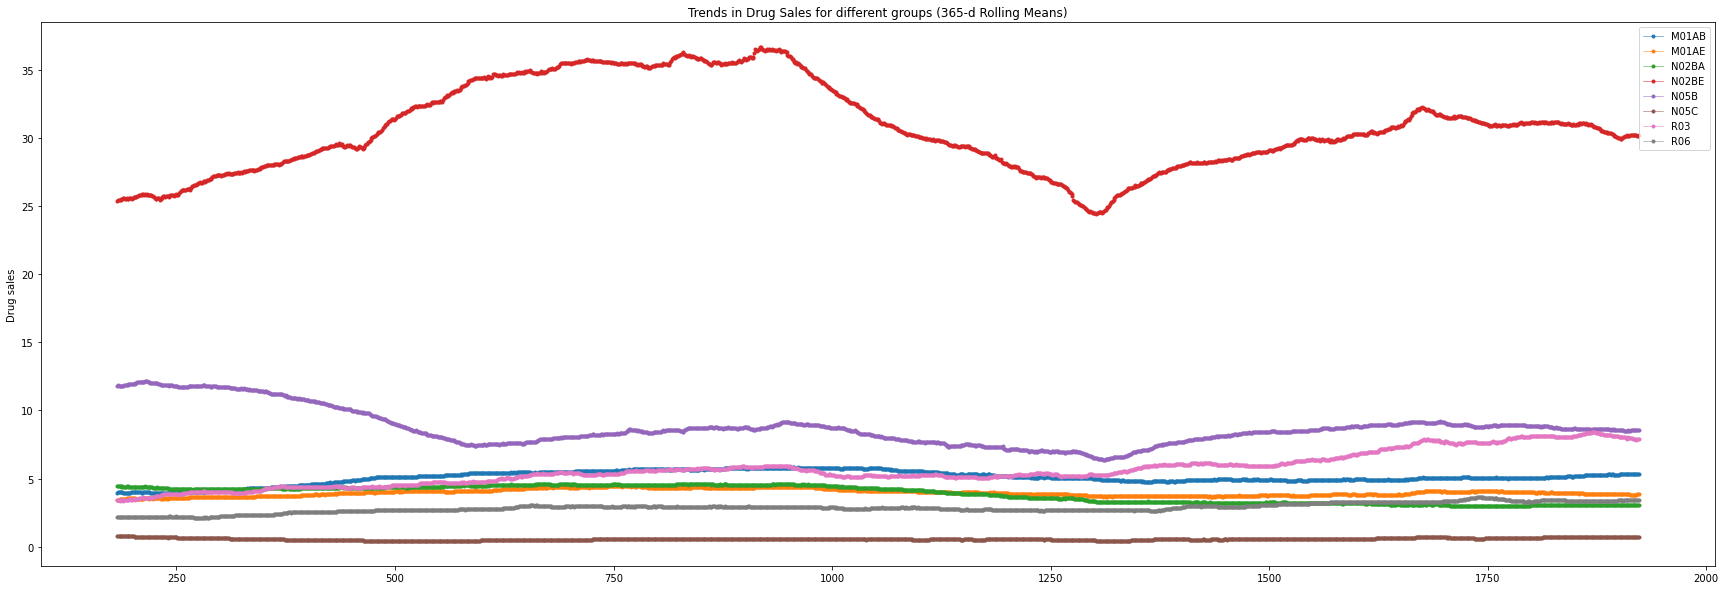

In [73]:
fig, ax = plt.subplots(figsize=(30, 10))
for nm in cols_plot:
    ax.plot(dfatc_365d[nm], label=nm, marker='.', linestyle='-', linewidth=0.5)
    ax.legend()
    ax.set_ylabel('Drug sales')
    ax.set_title('Trends in Drug Sales for different groups (365-d Rolling Means)');

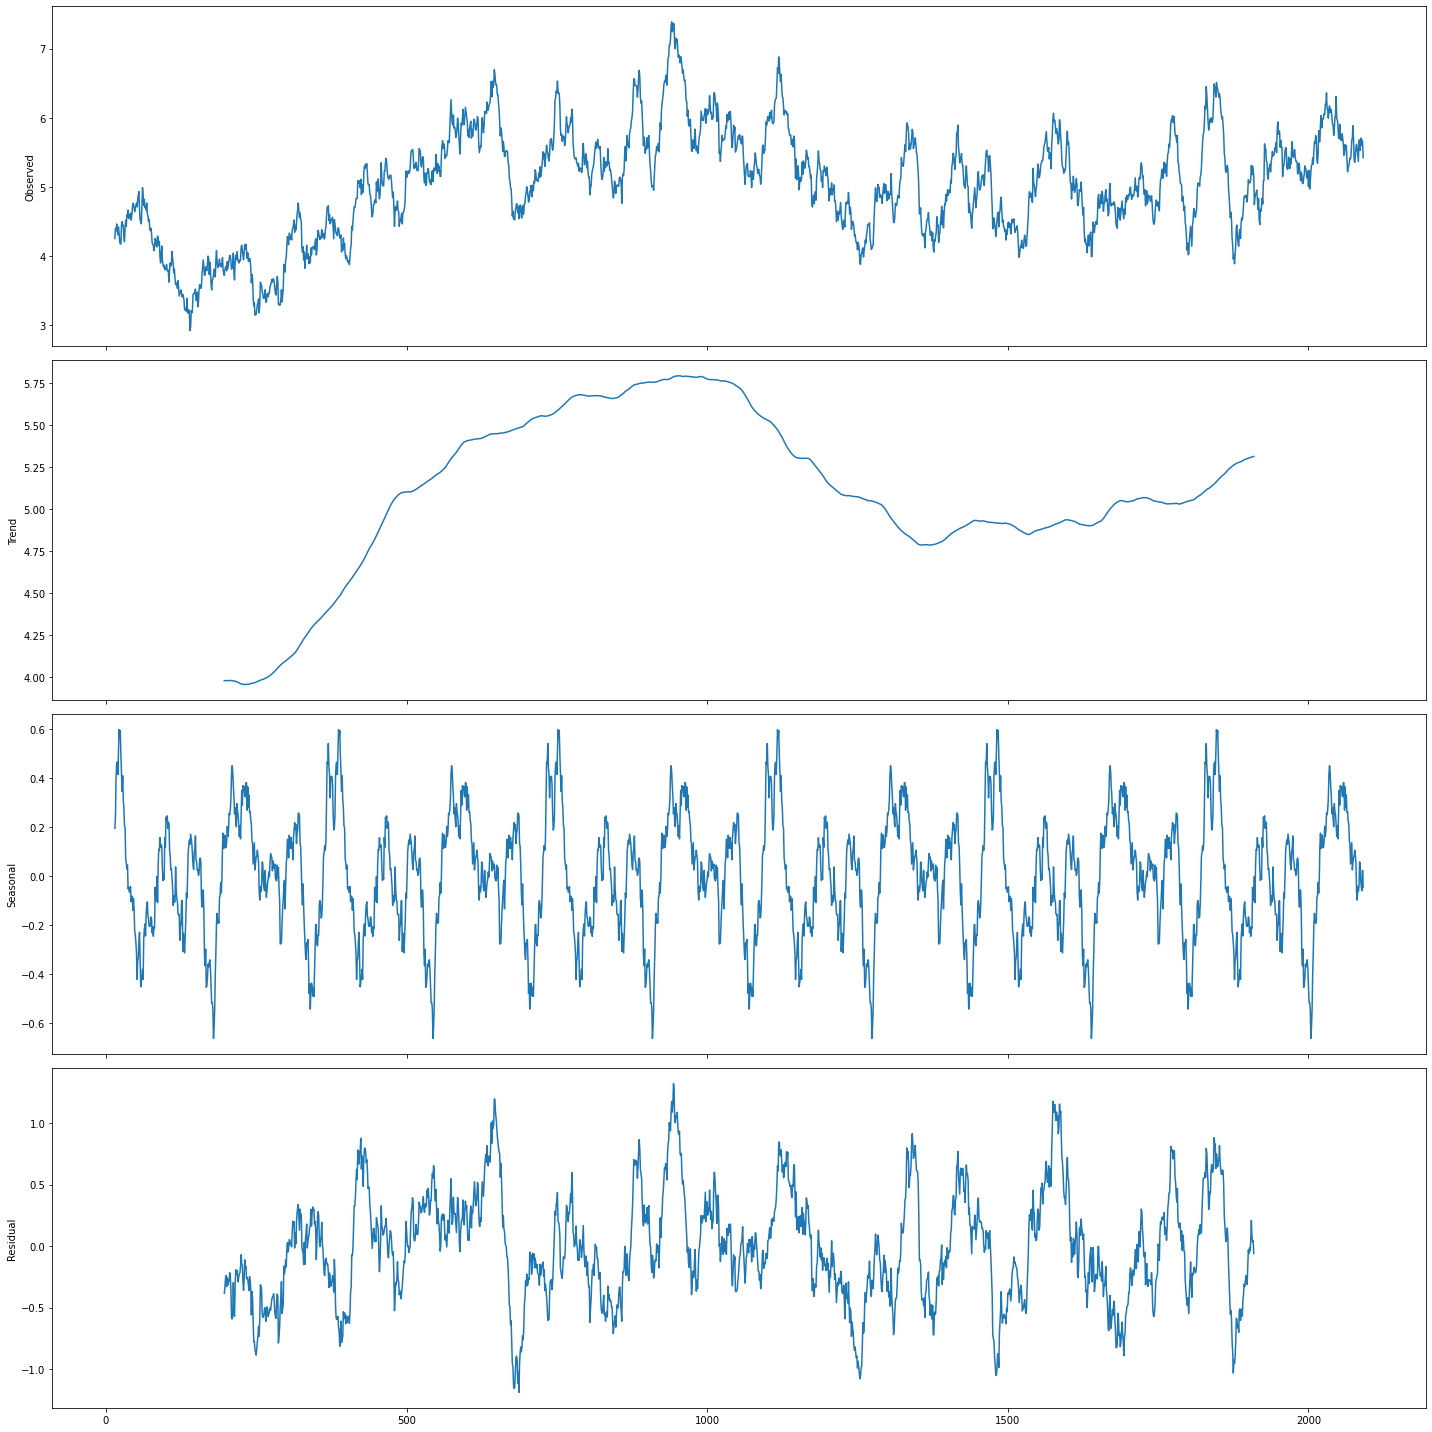

In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_sales_daily['M01AB'].rolling(30, center=True).mean().dropna(), freq=365, filt=None)
plt.rcParams["figure.figsize"] = (20,20)
result.plot()
plt.show()

In [77]:
for x in ['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']:
    result = seasonal_decompose(df_sales_weekly[x], freq=52, model = 'additive')
    dfs = pd.concat([result.trend, result.seasonal, result.resid, result.observed], axis=1)
    dfs.columns = ['trend', 'seasonal', 'residuals', 'observed']
    dfs = dfs.dropna()
    res = dfs['residuals'].values
    obs = dfs['observed'].values
    resmean = np.mean(np.abs(res))
    obsmean = np.mean(np.abs(obs))
    perc = resmean*100/obsmean
    print(x + ' RESMEAN:' + str(resmean) + ', OBSMEAN:' + str(obsmean) + ', PERC:' + str(perc) + '%')

M01AB RESMEAN:5.26715996284115, OBSMEAN:35.59490833332001, PERC:14.797509558159527%
M01AE RESMEAN:4.319542609675869, OBSMEAN:28.00801458336, PERC:15.422523423856601%
N02BA RESMEAN:3.9228389592521657, OBSMEAN:27.083016, PERC:14.484498178682042%
N02BE RESMEAN:29.534357236963668, OBSMEAN:217.6597028336, PERC:13.569051529737028%
N05B RESMEAN:12.94840305932125, OBSMEAN:61.96614999972, PERC:20.895929566997072%
N05C RESMEAN:2.0384606385595405, OBSMEAN:3.871833333332, PERC:52.648460382081936%
R03 RESMEAN:11.722244335544508, OBSMEAN:40.06845833336, PERC:29.25554119906046%
R06 RESMEAN:4.278758416393868, OBSMEAN:19.744589999960002, PERC:21.67053565762842%


## Stationarity Analysis

## Sales Prediction with Machine Learning